In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-10-15 20:28:50--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-10-15 20:28:51 (29.4 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

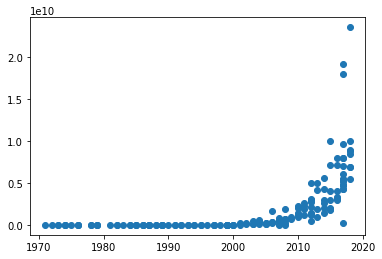

In [ ]:
plt.scatter(X,Y)

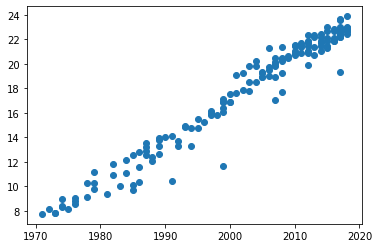

In [ ]:
Y = np.log(Y)
plt.scatter(X,Y)

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])


Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 315.4025
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 288.2932
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 240.7086
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 202.7686
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 161.9964
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 159.0644
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 114.0083
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 95.5988
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 49.7370
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 48.6445
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 31.4987
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 21.5672
Epoch 13/200
6/6 [========================

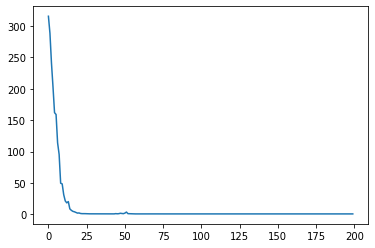

In [ ]:
plt.plot(r.history['loss'], label='loss')

In [ ]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3379089]], dtype=float32), array([17.768932], dtype=float32)]


In [ ]:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0512842166319047


In [ ]:
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

print(a, b)
print("Time to double: ", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204


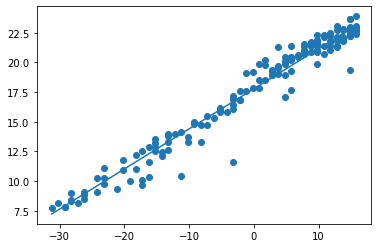

In [ ]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)



In [ ]:
w, b = model.layers[0].get_weights()

X = X.reshape(-1,1)

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat, Yhat2)

True